# **PROJECT: CUSTOMER CHURN PREDICTION**

## Customer Churn Prediction – No-Churn Telecom

### Project Type
Machine Learning – Classification

### Business Context
No-Churn Telecom is experiencing customer churn greater than 10% due to increasing competition.
Retaining customers is more cost-effective than acquiring new ones.

### Project Objectives
- Identify key factors influencing customer churn
- Predict whether a customer is likely to churn
- Create a binary **CHURN-FLAG** (1 = Yes, 0 = No)
- Generate churn risk scores to support targeted retention campaigns


### Data Understanding

### Data Source:

- Database Type: MySQL

- Database Name: project_telecom

- Table Name: telecom_churn_data

### Target Variable:

- Churn (Yes / No)

### Features Include:

- Customer usage details (Day, Evening, Night minutes)

- Plan information (International plan, Voice mail plan)

- Customer service interactions

- Call charges and call counts

### IMPORT REQUIRED LIBRARIES

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### DATASET COLUMNS

In [2]:
columns = [
    'State',
    'Account Length',
    'Area Code',
    'Phone',
    'International Plan',
    'VMail Plan',
    'VMail Message',
    'Day Mins',
    'Day Calls',
    'Day Charge',
    'Eve Mins',
    'Eve Calls',
    'Eve Charge',
    'Night Mins',
    'Night Calls',
    'Night Charge',
    'International Mins',
    'International Calls',
    'International Charge',
    'CustServ Calls',
    'Churn'
]

## Data Loading

The dataset contains customer-level telecom usage information such as:
- Call minutes (day, evening, night, international)
- Service plans (International, Voice Mail)
- Customer service interactions
- Churn status (target variable)

The data is loaded and inspected for structure and completeness.


In [3]:
import pymysql
import pandas as pd

conn = pymysql.connect(
    host="18.136.157.135",
    user="dm_team3",
    password="DM!$!Team!27@9!20&",
    database="project_telecom"
)

query = "SELECT * FROM telecom_churn_data"
df = pd.read_sql(query, conn)
df.columns = columns
df.head()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### OBSERVATION

In [4]:
df.shape

(4617, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account Length        4617 non-null   object
 2   Area Code             4617 non-null   object
 3   Phone                 4617 non-null   object
 4   International Plan    4617 non-null   object
 5   VMail Plan            4617 non-null   object
 6   VMail Message         4617 non-null   object
 7   Day Mins              4617 non-null   object
 8   Day Calls             4617 non-null   object
 9   Day Charge            4617 non-null   object
 10  Eve Mins              4617 non-null   object
 11  Eve Calls             4617 non-null   object
 12  Eve Charge            4617 non-null   object
 13  Night Mins            4617 non-null   object
 14  Night Calls           4617 non-null   object
 15  Night Charge          4617 non-null   

In [6]:
df.describe()

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,...,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


### Observations
- The dataset contains **4617 records** with no missing values
- Target variable **Churn** is categorical
- Mix of numerical and categorical features
- Data quality is good and suitable for ML modeling

### DATA PREPROCESSING

#### 1.TARGET VARIABLE TRANSFORMATION

In [7]:
df['Churn'] = (
    df['Churn']
    .astype(str)
    .str.strip()        # remove leading/trailing spaces
    .str.replace('.', '', regex=False)# remove dot
    .str.upper()
)

In [8]:
df['Churn'].unique()

array(['FALSE', 'TRUE'], dtype=object)

In [9]:
df['Churn Flag'] = df['Churn'].map({'TRUE': 1, 'FALSE': 0})
df

,State,Account Length,Area Code,Phone,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Churn Flag
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10,3,2.7,1,FALSE,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.7,1,FALSE,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.3,162.6,104,7.32,12.2,5,3.29,0,FALSE,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,FALSE,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,FALSE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,15.91,158.6,122,7.14,8.5,6,2.3,3,FALSE,0
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,25.76,163.6,116,7.36,15.7,1,4.24,3,FALSE,0
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,25.17,200.9,91,9.04,13,3,3.51,1,FALSE,0
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,19.24,165.5,96,7.45,14.3,3,3.86,0,FALSE,0


## Removing Irrelevant Features

The following columns are removed:
- **Phone**: Unique identifier, no predictive value
- **State**: High cardinality and limited direct impact without aggregation


In [10]:
df.drop(['Phone', 'State'], axis=1, inplace=True)

## DATA VISUALIZATION

#### 1. TARGET VARIABLE DISTRIBUTION

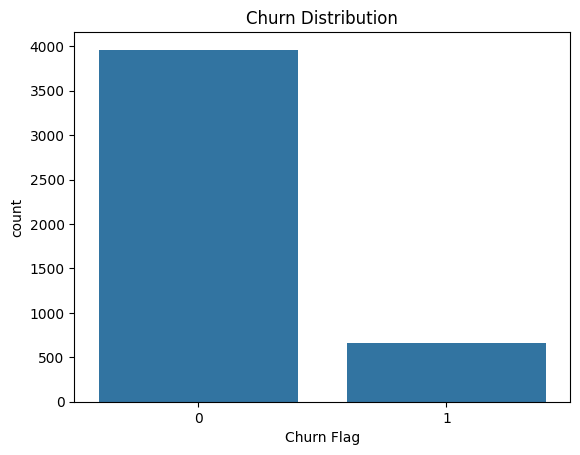

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Flag', data=df)
plt.title("Churn Distribution")
plt.show()

### Insight
- Majority of customers did not churn
- Churned customers form a smaller but business-critical segment
- Accuracy alone may be misleading; recall is important

#### 2. INTERNATIONAL CALL VS CHURN

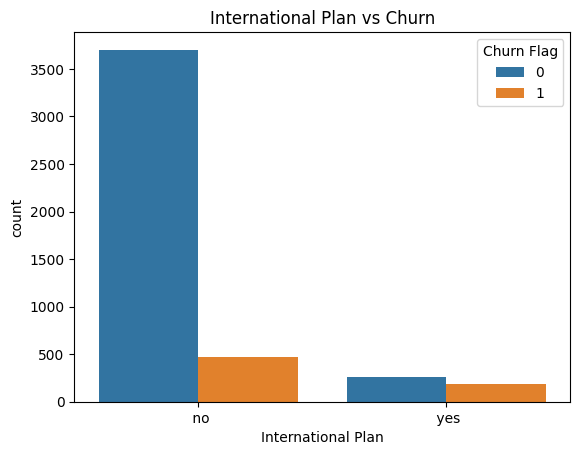

In [13]:
sns.countplot(x='International Plan', hue='Churn Flag', data=df)
plt.title("International Plan vs Churn")
plt.show()

#### 3. VOICE MAIL VS CHURN

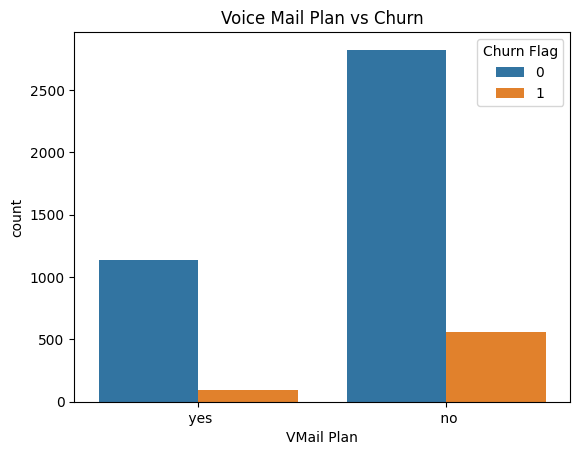

In [14]:
sns.countplot(x='VMail Plan', hue='Churn Flag', data=df)
plt.title("Voice Mail Plan vs Churn")
plt.show()

## Encoding Categorical Variables

Machine learning models require numerical inputs.
Categorical features such as plan types are converted into numeric format using Label Encoding.


In [15]:
le = LabelEncoder()

categorical_cols = ['International Plan', 'VMail Plan']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

### FEATURE AND TARGET SPLIT

In [16]:
X = df.drop(['Churn', 'Churn Flag'], axis=1)
y = df['Churn Flag']

### Train–Test Split

The dataset is split into training and testing sets:
- 75% for training
- 25% for testing

Stratification is used to maintain the churn ratio in both sets and avoid biased evaluation.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
X_train.columns

Index(['Account Length', 'Area Code', 'International Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'International Mins', 'International Calls', 'International Charge',
       'CustServ Calls'],
      dtype='object')

### MODEL TRAINING AND EVALUATION

### Model 1: Logistic Regression

Logistic Regression is used as a baseline classification model.
It is simple, interpretable, and commonly used for binary classification problems like churn.

In [19]:
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=3000,
    solver='liblinear'
)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)

# Recall for churn class (1)
recall = recall_score(y_test, y_pred_lr)

print("Logistic Regression Performance")
print("Accuracy :", accuracy)
print("Recall   :", recall)

Logistic Regression Performance
Accuracy : 0.7445887445887446
Recall   : 0.8152866242038217



Confusion Matrix:
 [[732 266]
 [ 29 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83       998
           1       0.32      0.82      0.46       157

    accuracy                           0.74      1155
   macro avg       0.64      0.77      0.65      1155
weighted avg       0.88      0.74      0.78      1155



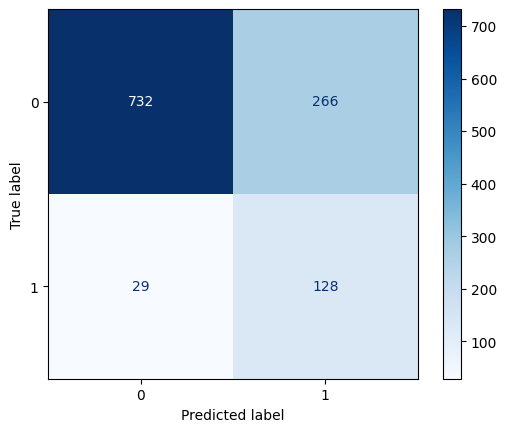

In [20]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Interpretation
- The model provides a reasonable baseline performance
- Recall for churn customers is more important than raw accuracy
- Logistic Regression helps understand linear relationships

### Model 2: Random Forest Classifier(Final model)

Random Forest is an ensemble learning method that:
- Captures non-linear relationships
- Handles feature interactions effectively
- Is robust to overfitting


In [21]:
rf = RandomForestClassifier(
    class_weight='balanced',
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)

# Recall for churn class (1)
recall = recall_score(y_test, y_pred_rf)

print("Logistic Regression Performance")
print("Accuracy :", accuracy)
print("Recall   :", recall)

Logistic Regression Performance
Accuracy : 0.9627705627705627
Recall   : 0.7515923566878981



Confusion Matrix:
 [[994   4]
 [ 39 118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       998
           1       0.97      0.75      0.85       157

    accuracy                           0.96      1155
   macro avg       0.96      0.87      0.91      1155
weighted avg       0.96      0.96      0.96      1155



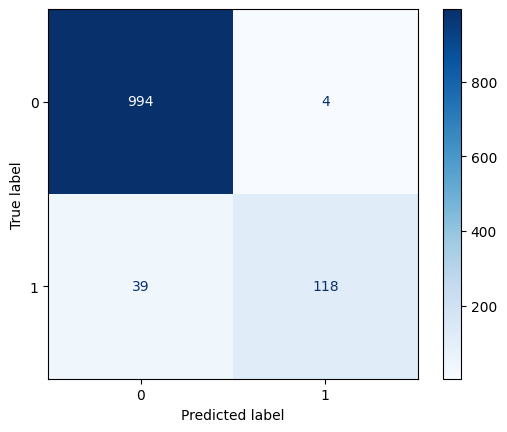

In [22]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Interpretation
- Random Forest outperforms Logistic Regression
- Better recall for churn customers
- Suitable for production deployment

### Final Model Selection

Multiple models were trained and evaluated for churn prediction.
Although Logistic Regression provided a good baseline,
it achieved lower recall for churn customers.

After hyperparameter tuning and evaluation,
the **Random Forest Classifier** was selected as the final model
because it achieved the best balance between **recall and accuracy**.

This model is suitable for production use as it successfully identifies
a majority of churn-prone customers while maintaining overall performance.


### Feature Importance Analysis

Feature importance helps identify **why customers churn**.
This insight can directly support business decision-making and retention strategies.


In [23]:
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

CustServ Calls         0.144961
Day Charge             0.139745
Day Mins               0.126642
International Plan     0.091241
Eve Charge             0.056952
Eve Mins               0.056442
International Mins     0.042670
Night Mins             0.041437
International Calls    0.038931
Night Charge           0.037914
dtype: float64

### Key Business Insights
- High customer service calls strongly indicate churn
- International plan usage impacts churn behavior
- Usage patterns are critical predictors

### Churn Risk Score Generation

A churn risk score (0–1) is generated using prediction probabilities.
Higher values indicate higher likelihood of churn.

This score can be used by marketing teams to:
- Prioritize retention campaigns
- Offer targeted incentives


In [24]:
df['Churn_Risk_Score'] = rf.predict_proba(X)[:,1]

### Final output

In [25]:
df[['Churn Flag', 'Churn_Risk_Score']].head()

,Churn Flag,Churn_Risk_Score
0,0,0.03
1,0,0.00
2,0,0.02
3,0,0.11
4,0,0.03


### Save the best model(random forest)

In [27]:
final_model = lr

import pickle
model_name = "customer-churn-prediction.pkl"

#save the model
with open(model_name, 'wb') as f:
    pickle.dump(final_model, f)

print("Model saved as:", model_name)

Model saved as: customer-churn-prediction.pkl


### Conclusion – Churn Flag & Risk Score

The table above displays the actual churn flag alongside the predicted churn risk score for each customer.
The churn risk score represents the probability of a customer churning, with higher values indicating
greater churn risk.

Customers with **Churn Flag = 1** generally have **higher churn risk scores**, validating the effectiveness
of the model. This score enables the business to prioritize customers for retention campaigns, allowing
targeted offers and proactive engagement for high-risk customers while optimizing marketing resources.

### Final Conclusion

- Customer churn can be effectively predicted using machine learning
- Random Forest performed better than Logistic Regression
- Customer service calls and usage behavior are key churn drivers
- Churn risk scores enable proactive customer retention strategies

This model can support data-driven decision-making in telecom customer management.
